In [8]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import lines
import matplotlib.cm as cm
import tqdm
from tqdm.notebook import tqdm as tqdm

import model_opt
import data_generate
import algo_GD

_t_max =100000
_cmap = plt.cm.jet

In [9]:
# データの形成
data = data_generate.Data(N=1000,d=2,err=0.1)
X,y,w_init,w = data.generate_data()

In [10]:
# Bohachevskyのf_optは１次元のBohachevsky関数を返す。g_optは２次元の勾配を返す。

f = model_opt.Bohachevsky(err = 0)
algo = algo_GD.GD(w=w_init,t_max=_t_max)

In [11]:
for i in algo:
    algo.update(model=f,a=0.01)
    algo.loss(X,y)

In [12]:
w_store = np.array(algo.wstore)
loss_transition = np.array(algo.loss_store)

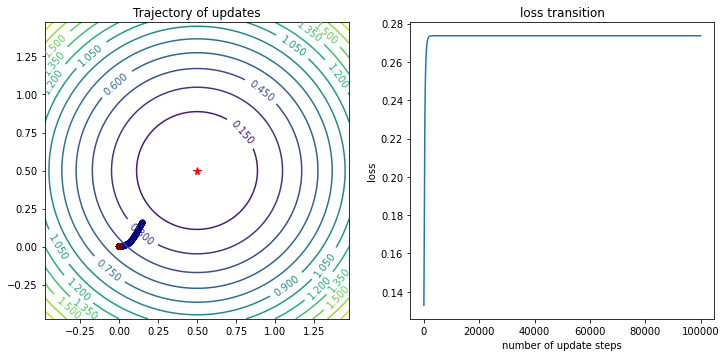

In [13]:
w_star = w


# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2


tmpdel = np.linalg.norm(w_star-w_init) * 2
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)

ax2 = myfig.add_subplot(2,2,2)

plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

In [7]:
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y)
Z = f.f_opt([X,Y])
print(Z)


[[3.6        3.57876859 3.55508618 ... 3.52898811 3.55508618 3.57876859]
 [3.56335412 3.54212271 3.51844029 ... 3.49234223 3.51844029 3.54212271]
 [3.53336674 3.51213532 3.48845291 ... 3.46235484 3.48845291 3.51213532]
 ...
 [3.50988941 3.488658   3.46497558 ... 3.43887751 3.46497558 3.488658  ]
 [3.53336674 3.51213532 3.48845291 ... 3.46235484 3.48845291 3.51213532]
 [3.56335412 3.54212271 3.51844029 ... 3.49234223 3.51844029 3.54212271]]


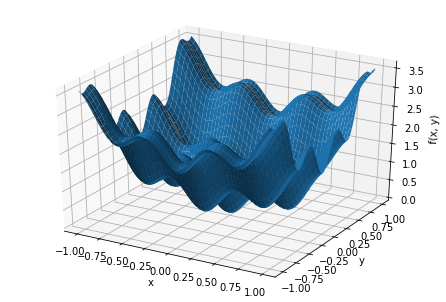

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

ax.plot_surface(X, Y, Z)
plt.show()

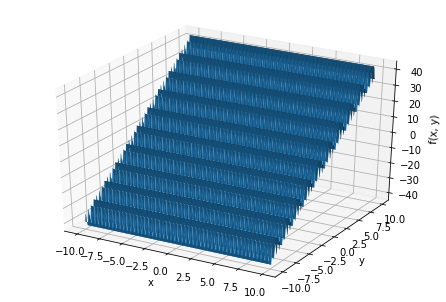

In [9]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)
Z = f.g_opt([X,Y])[1]
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

ax.plot_surface(X, Y, Z)
plt.show()

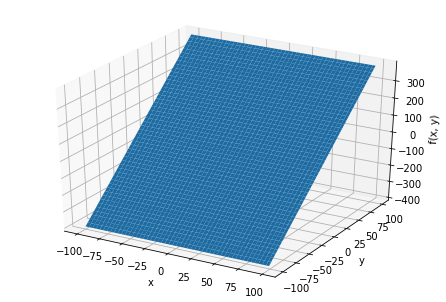

In [10]:
x = np.arange(-100, 100, 1)
y = np.arange(-100, 100, 1)
X, Y = np.meshgrid(x, y)
Z = f.g_opt([X,Y])[1]

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

ax.plot_surface(X, Y, Z)
plt.show()

In [14]:
d = np.array([[1,2],[2,3]])

c = np.array([1,2])



In [15]:
c.ndim

1

In [15]:
w * X

array([[ 0.45356185, -0.15460755],
       [ 0.56722114, -0.40140945],
       [ 0.1056232 ,  0.42892421],
       ...,
       [ 0.40365572,  0.79038224],
       [ 0.41360981, -0.4480968 ],
       [ 0.37809381, -0.18976913]])

In [16]:
w

array([0.5, 0.5])

In [17]:
X

array([[ 0.90712369, -0.3092151 ],
       [ 1.13444227, -0.8028189 ],
       [ 0.21124639,  0.85784842],
       ...,
       [ 0.80731144,  1.58076447],
       [ 0.82721961, -0.8961936 ],
       [ 0.75618761, -0.37953825]])

In [18]:
X.shape

(1000, 2)

In [26]:
X.dot(w) - y

array([-6.59780875e-02,  6.31202407e-02,  4.63935950e-02,  8.00127896e-03,
       -7.28407097e-03,  4.83606702e-02, -7.22090546e-03,  6.01638724e-02,
       -1.02347535e-01, -1.22899977e-02,  4.95120113e-02, -5.44864963e-02,
       -1.10349015e-01, -1.88377817e-01,  2.37921001e-02,  1.02185308e-01,
        3.08667291e-02,  1.84957851e-02, -2.08128674e-01, -8.61090156e-03,
       -1.20871910e-01, -9.53469697e-02, -1.05160104e-01,  2.35512053e-01,
       -1.91862346e-02,  4.40924261e-02,  1.02591295e-01, -6.65925066e-04,
       -4.90304559e-02,  3.83120667e-02, -1.40510914e-01,  1.15838390e-01,
        2.07381133e-01,  8.91064742e-02,  2.53315363e-02,  2.10750905e-02,
        9.07173425e-02,  9.65168566e-02, -8.33406270e-02,  1.43314017e-01,
        2.52753439e-02,  9.48606851e-02,  2.87182335e-02, -4.95347993e-02,
        6.98585540e-02, -5.90987424e-02,  3.84892483e-02,  1.68303134e-01,
        6.82144792e-03,  1.33122261e-01,  9.25513041e-02,  5.61833694e-02,
       -1.34569482e-01, -

In [23]:
np.sum(w * X, axis=1)

(1000,)